In [1]:
from keras.datasets import mnist

#loading mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


label : 7


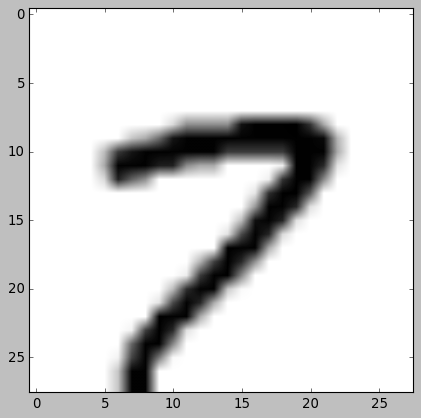

In [2]:
import matplotlib.pyplot as plt
plt.style.use('classic')

n=123
#printing nth matrix's corresponding label
print(f'label : {y_train[n]}')
#visualizing nth matrix as an image
plt.imshow(X_train[n], cmap='binary')
plt.show()

In [3]:
#Exploring nth matrix which is a 28x28 matrix. 
#Each cell of this matrix contains a value which is nothing but 2's complement.
#Each of the value represent a color code, where 0 means white and 255 means black.
X_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [4]:
from keras.utils import normalize

#normalizing is similar to StandardScaler, but normalize works for (>2) dimentional matrix. 
#it scales the values between 0 and 1.
X_train = normalize(X_train)
X_test = normalize(X_test)

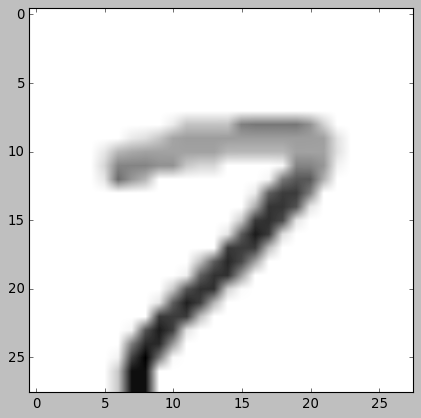

In [5]:
#visualizing nth matrix as an image after normalization and noticed the difference.
plt.imshow(X_train[n], cmap='binary')
plt.show()

In [6]:
#exploring nth matrix after applying normalization.
X_train[n]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
import numpy as np
import time

start = time.time()

#building a neural network.
def build_nn(optimizer):
    #initializing the model
    nn = Sequential()
    #since, we will provide input as matrix, so, this will convert out lxm dimentional matrix into vector.
    nn.add(Flatten())
    #first hidden layer.
    #units contains the number of neuron of our hidden layer.
    #activation function RELU will return binary value, either 0 or 1.
    #it means it will deside either a neuron will hit or not. that's why we use RELU for our hidden layers.
    #and SOFTMAX/SIGMOID will return decimal value between 0 and 1, that's why we use it for our output layer.
    #in this case it will return something like our output is [(0.69O),.......,(0.001)]. 
    #it means the output is 69% sure it is a zero and 1% sure it is a 9.
    nn.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'uniform'))
    #second hidden layer
    nn.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'uniform'))
    #third hidden layer
    nn.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'uniform'))
    #fourth hidden layer
    nn.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'uniform'))
    #fifth hidden layer
    nn.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'uniform'))
    #output layer
    nn.add(Dense(units = 10, activation = 'softmax', kernel_initializer = 'uniform'))
    #compiling the nn
    nn.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    #returning the nn
    return nn

nn = build_nn('adam')
#fit the nn using training data
nn.fit(x = X_train, y = y_train,batch_size = 5, epochs=5)


end = time.time()

Epoch 1/5
60000/60000 [==============================] - 27s 442us/step - loss: 0.4262 - accuracy: 0.8530
Epoch 2/5
60000/60000 [==============================] - 23s 379us/step - loss: 0.1510 - accuracy: 0.9593
Epoch 3/5
60000/60000 [==============================] - 24s 396us/step - loss: 0.1139 - accuracy: 0.9691
Epoch 4/5
60000/60000 [==============================] - 25s 419us/step - loss: 0.0935 - accuracy: 0.9746
Epoch 5/5
60000/60000 [==============================] - 27s 452us/step - loss: 0.0814 - accuracy: 0.9784


In [9]:
#total running time in min
(end - start)/60

2.1183072765668234

In [10]:
#predicting labels using test data
y_pred = nn.predict(X_test)

label : 4
predicted : 4


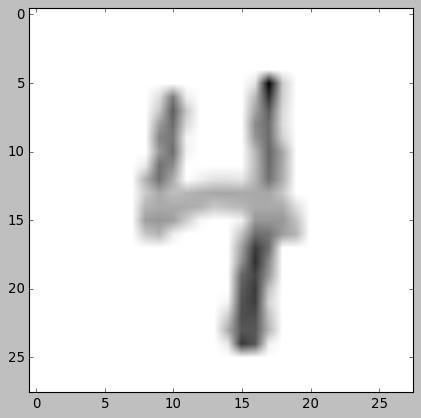

In [11]:
import numpy as np

pred_n = 169
#printing label of nth item
print(f'label : {y_test[pred_n]}')
#printing we our model predicted, here we used argmax which returns the index of maximum value of a list.
#our model's output is a list which contains 10 elements and a decimal value.
#here our model returned a list where 4th index contains the biggest value. hence prediction is 4.
print(f'predicted : {np.argmax(y_pred[pred_n])}')
plt.imshow(X_test[pred_n], cmap = 'binary')
plt.show()

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

#parameter tuning, finding the best parameter for our model
classifier = KerasClassifier(build_fn = build_nn)

parameters = {
    'batch_size' : [5, 10],
    'epochs' : [5, 10],
    'optimizer' : ['adam', 'rmsprop']
}

grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)